In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [4]:
data=pd.read_csv("..\\Train.csv")
data.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09,20014
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,78,23948.0,42119.05,76206.0,21,63,23226.0,Y,13043.34,10173
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,82,10752.0,58373.25,75283.0,7,1,27036.0,Y,25375.27,16095
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,38,12607.0,69851.51,68708.0,21,83,43037.0,Y,3544.33,7707
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,50,25213.0,10071.00,80140.0,8,32,32044.0,Y,12780.44,96408


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 44 columns):
ID                       15000 non-null int64
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null int64
cc_cons_apr              15000 non-null float64
dc_cons_apr              15000 non-null float64
cc_cons_may              15000 non-null float64
dc_cons_may              15000 non-null float64
cc_cons_jun              15000 non-null float64
dc_cons_jun              15000 non-null float64
cc_count_apr             15000 non-null int64
cc_count_may             15000 non-null int64
cc_count_jun             15000 non-null int64
dc_count_apr             15000 non-null int64
dc_count_may             15000 non-null int64
dc_count_jun             15000 non-null int64
card_lim                 15000 non-null int64
personal_loan_active     15000 non-null int64
veh

In [13]:
for cols in data.drop('ID',1).columns:
    print(data[cols].describe(), '\n','-'*30)

count       15000
unique          2
top       current
freq        12727
Name: account_type, dtype: object 
 ------------------------------
count     15000
unique        2
top           M
freq      12945
Name: gender, dtype: object 
 ------------------------------
count    15000.000000
mean        47.790600
std         30.632766
min         25.000000
25%         33.000000
50%         40.000000
75%         53.000000
max        223.000000
Name: age, dtype: float64 
 ------------------------------
count    15000.000000
mean       598.415467
std        220.062345
min        123.000000
25%        424.000000
50%        623.000000
75%        799.000000
max        974.000000
Name: region_code, dtype: float64 
 ------------------------------
count     15000.000000
mean      17957.391719
std       25187.939958
min         253.000000
25%        4411.027500
50%       10288.100000
75%       21405.000000
max      441031.330000
Name: cc_cons_apr, dtype: float64 
 ------------------------------
count  

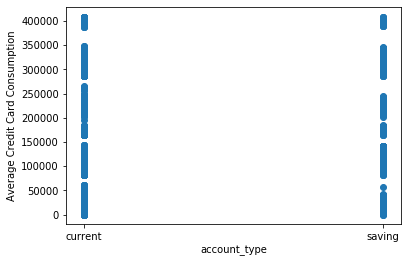

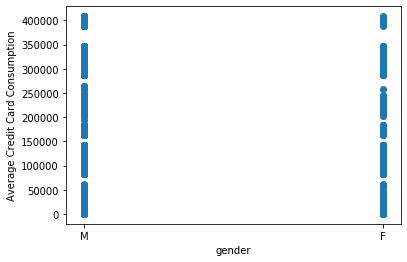

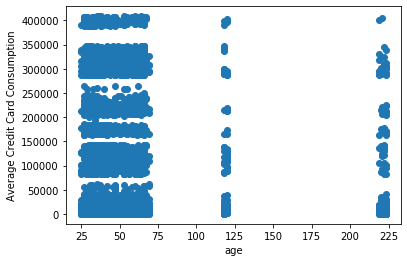

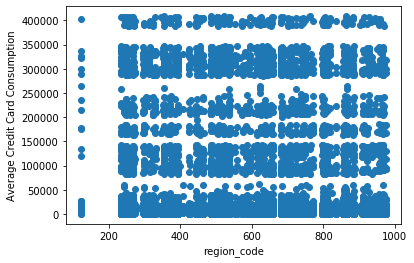

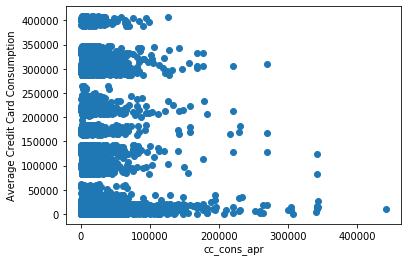

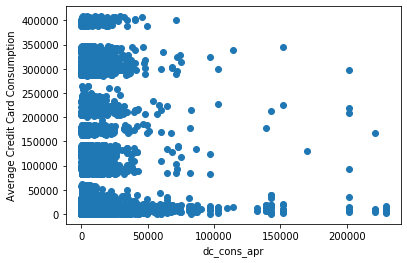

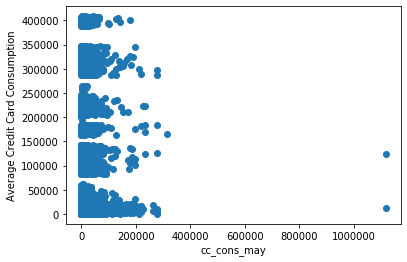

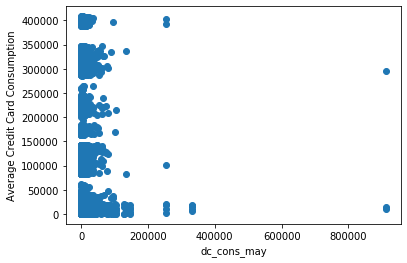

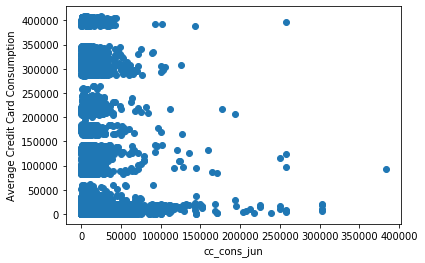

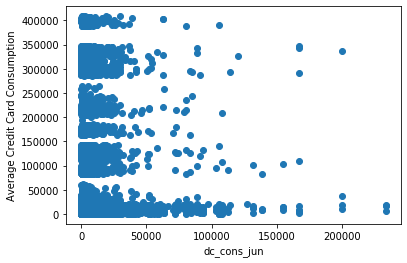

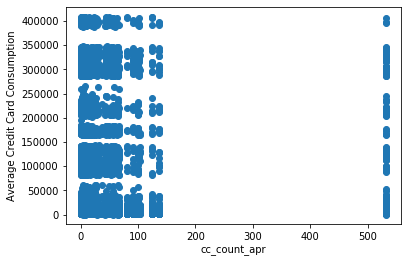

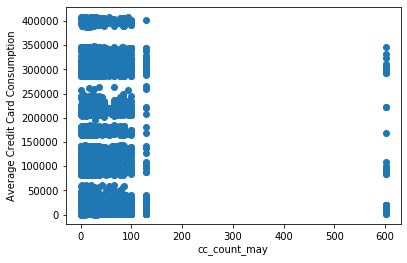

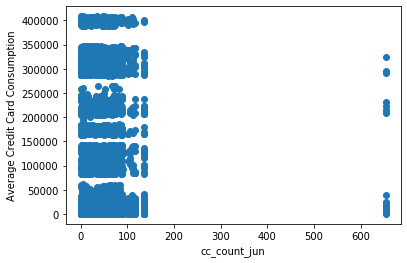

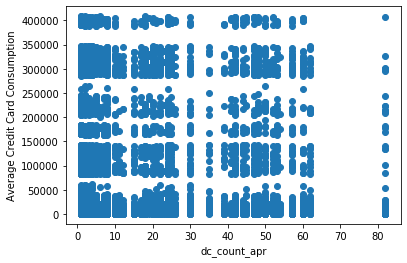

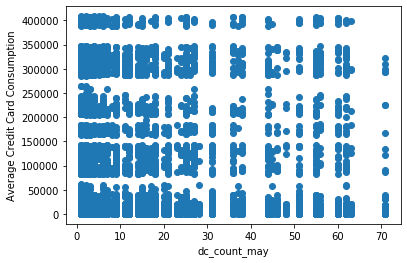

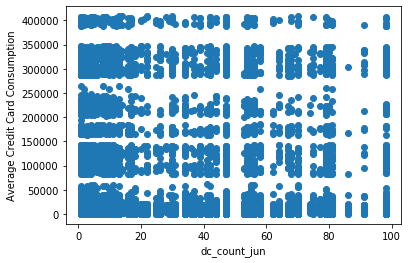

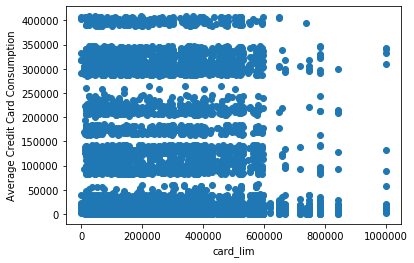

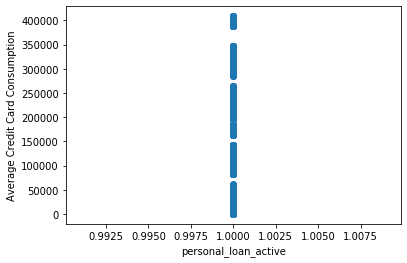

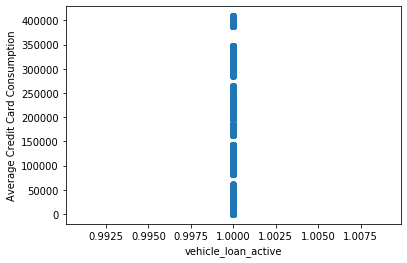

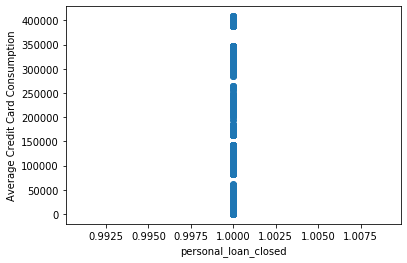

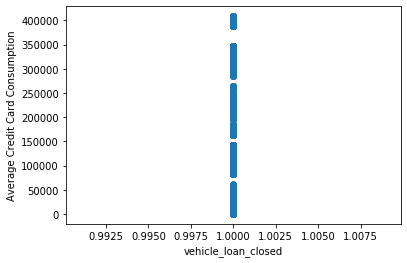

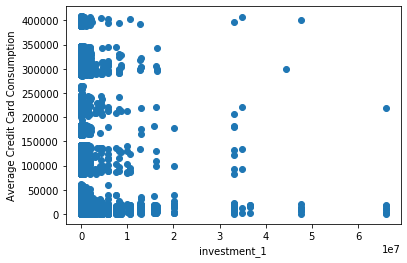

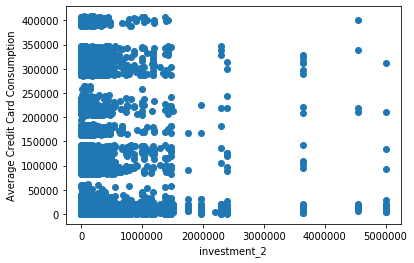

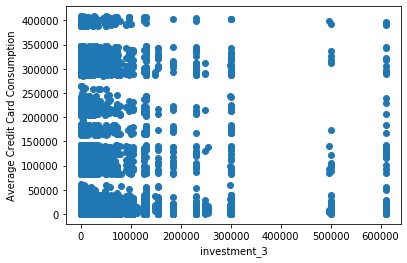

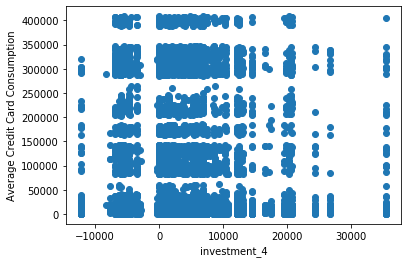

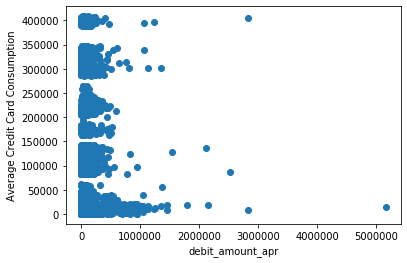

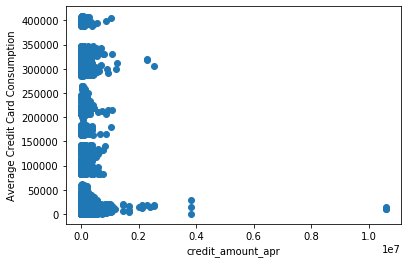

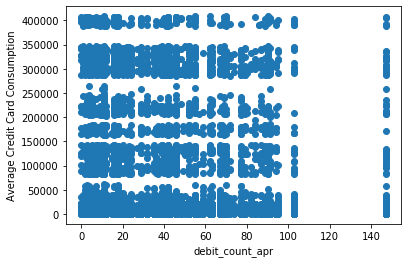

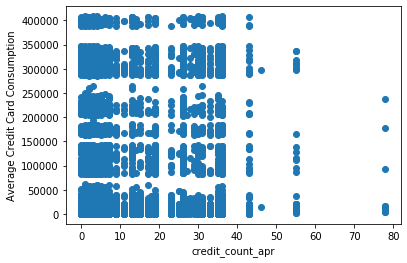

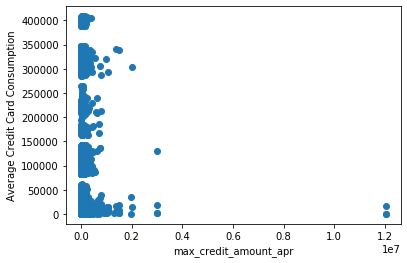

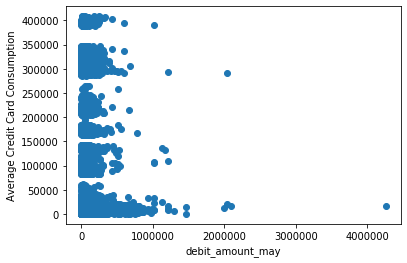

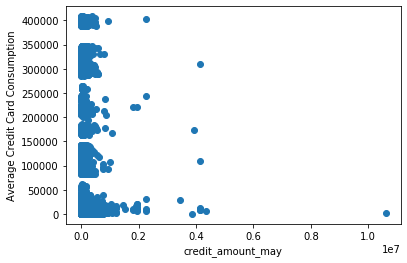

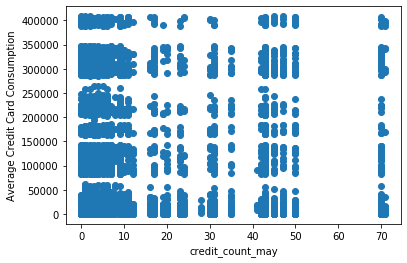

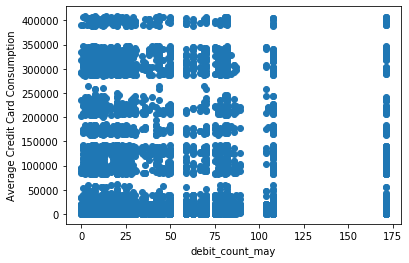

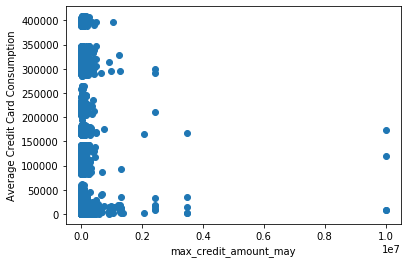

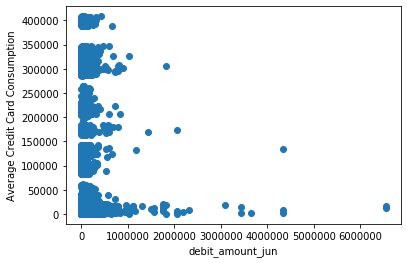

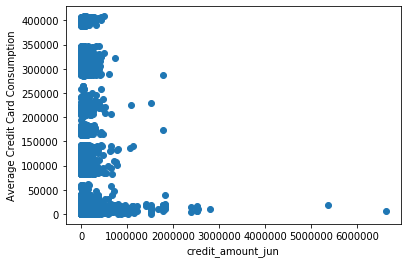

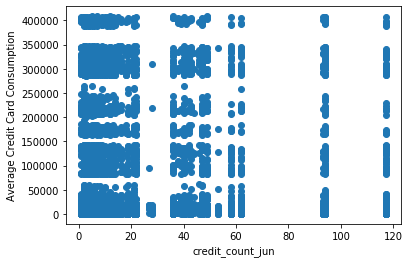

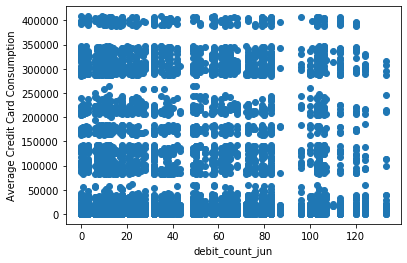

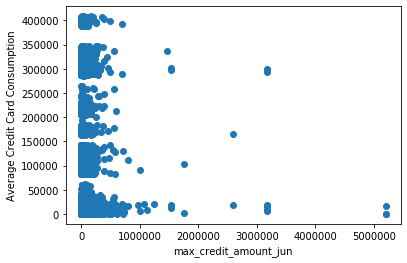

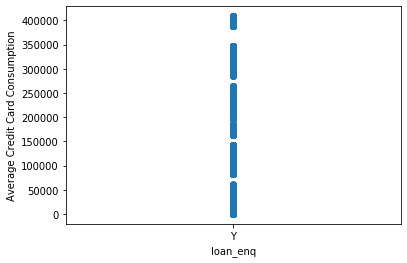

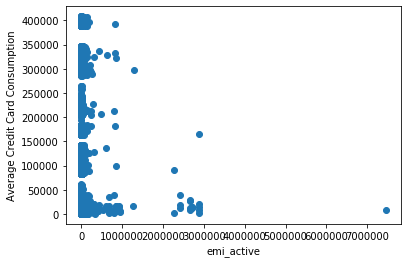

In [14]:
for cols in data.drop(['cc_cons','ID'],1).columns:
    plt.scatter(data[cols], data['cc_cons'])
    plt.xlabel(cols)
    plt.ylabel('Average Credit Card Consumption')
    plt.show()

In [15]:
data.skew()

ID                       -0.000523
age                       4.386093
region_code              -0.118365
cc_cons_apr               4.838710
dc_cons_apr               7.135574
cc_cons_may              12.056921
dc_cons_may              25.321685
cc_cons_jun               6.108982
dc_cons_jun               6.569554
cc_count_apr              4.417547
cc_count_may              7.518349
cc_count_jun              7.190550
dc_count_apr              1.102698
dc_count_may              1.526300
dc_count_jun              0.732877
card_lim                  0.442569
personal_loan_active      0.000000
vehicle_loan_active       0.000000
personal_loan_closed      0.000000
vehicle_loan_closed       0.000000
investment_1             11.603971
investment_2              5.475358
investment_3              4.075013
investment_4              1.084492
debit_amount_apr         13.104348
credit_amount_apr        32.632376
debit_count_apr           1.089453
credit_count_apr          1.161724
max_credit_amount_ap

In [17]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','No.of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'No.of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

outliers_df=detect_outliers(data)

In [23]:
outliers_df

,Feature,No.of Outliers
0,ID,0
1,age,534
2,region_code,0
3,cc_cons_apr,1217
4,dc_cons_apr,1220
5,cc_cons_may,1202
6,dc_cons_may,1248
7,cc_cons_jun,1181
8,dc_cons_jun,1366
9,cc_count_apr,883


In [24]:
for col in data.drop(['loan_enq','account_type','gender','ID'],1).columns:
    data[col]=np.sqrt(data[col])

C:\Users\AP hatela\Miniconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
data.skew()

ID                      -0.000523
age                      3.104259
region_code             -0.408972
cc_cons_apr              1.627942
dc_cons_apr              2.207385
cc_cons_may              2.002009
dc_cons_may              3.294896
cc_cons_jun              1.890619
dc_cons_jun              2.317558
cc_count_apr             2.653844
cc_count_may             1.677811
cc_count_jun             0.932037
dc_count_apr             0.592788
dc_count_may             0.884374
dc_count_jun             0.219475
card_lim                -0.254473
personal_loan_active     0.000000
vehicle_loan_active      0.000000
personal_loan_closed     0.000000
vehicle_loan_closed      0.000000
investment_1             4.713771
investment_2             1.784030
investment_3             1.833091
investment_4             0.394800
debit_amount_apr         2.415966
credit_amount_apr        4.068821
debit_count_apr          0.244746
credit_count_apr         0.586594
max_credit_amount_apr    7.221904
debit_amount_m

In [26]:
df2=data.set_index('ID').drop(['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],1)

In [27]:
df2.isna().sum()

account_type                0
gender                      0
age                         0
region_code                 0
cc_cons_apr                 0
dc_cons_apr                 0
cc_cons_may                 0
dc_cons_may                 0
cc_cons_jun                 0
dc_cons_jun                 0
cc_count_apr                0
cc_count_may                0
cc_count_jun                0
dc_count_apr                0
dc_count_may                0
dc_count_jun                0
card_lim                    0
investment_1                0
investment_2                0
investment_3                0
investment_4             3225
debit_amount_apr            0
credit_amount_apr           0
debit_count_apr             0
credit_count_apr            0
max_credit_amount_apr       0
debit_amount_may            0
credit_amount_may           0
credit_count_may            0
debit_count_may             0
max_credit_amount_may       0
debit_amount_jun            0
credit_amount_jun           0
credit_cou

In [28]:
df2.investment_4 =df2.investment_4 .fillna(0)

In [29]:
le_account_type=LabelEncoder()
df2['account_type']=le_account_type.fit_transform(df2['account_type'])

In [30]:
le_gender=LabelEncoder()
df2['gender']=le_gender.fit_transform(df2['gender'])

In [36]:
X=df2.drop('cc_cons',1)
y=df2['cc_cons']
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=3)

In [37]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_pred_train_lr=lr.predict(X_train)
y_pred_val_lr=lr.predict(X_val)

In [52]:
train_rmsle=rmsle(y_train, y_pred_train_lr)
val_rmsle=rmsle(y_val, y_pred_val_lr)
print(train_rmsle, val_rmsle)

0.8580930615254136 0.8660082540959326


In [40]:
test=pd.read_csv('..\\Test.csv')
test.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.45,1290.0,6141.05,676.50,9146.10,...,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,...,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.20,6189.0,2696.09,766.00,716.00,...,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28
3,8687,current,M,33,370,2105.93,18225.0,34763.56,167.00,4260.27,...,3.0,5.0,97825.0,93572.42,109429.75,21.0,0.0,72317.00,Y,340.79
4,14727,current,M,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,...,70.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20


In [41]:
X_test=test.set_index('ID').drop(['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],1)

In [42]:
for col in X_test.drop(['account_type','gender'],1).columns:
    X_test[col]=np.sqrt(X_test[col])

C:\Users\AP hatela\Miniconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
X_test['account_type']=le_account_type.transform(X_test['account_type'])

X_test['gender']=le_gender.transform(X_test['gender'])

In [45]:
X_test.isna().sum()

account_type                0
gender                      0
age                         0
region_code                 0
cc_cons_apr                 0
dc_cons_apr                 0
cc_cons_may                 0
dc_cons_may                 0
cc_cons_jun                 0
dc_cons_jun                 0
cc_count_apr                0
cc_count_may                0
cc_count_jun                0
dc_count_apr                0
dc_count_may                0
dc_count_jun                0
card_lim                    0
investment_1                0
investment_2                0
investment_3                0
investment_4             1108
debit_amount_apr            0
credit_amount_apr           0
debit_count_apr             0
credit_count_apr            0
max_credit_amount_apr       0
debit_amount_may            0
credit_amount_may           0
credit_count_may            0
debit_count_may             0
max_credit_amount_may       0
debit_amount_jun            0
credit_amount_jun           0
credit_cou

In [46]:
X_test.investment_4=X_test.investment_4.fillna(0)

In [53]:
y_pred_lr=lr.predict(X_test)
y_pred_lr**2

array([31336.16193461, 32866.38652268, 33425.55924627, ...,
       29929.62240881, 29098.14449632, 31272.24574814])

In [68]:
y_pred**2

array([31336.16193461, 32866.38652268, 33425.55924627, ...,
       29929.62240881, 29098.14449632, 31272.24574814])

In [64]:
X_test['cc_cons']=y_pred**2

result2=pd.DataFrame(X_test['cc_cons'])

result2.to_csv('submission_lr.csv',index=True)

result2

,cc_cons
ID,
17591,31336.161935
13541,32866.386523
13431,33425.559246
8687,35378.825639
14727,30995.236011
...,...
12512,30088.266775
14224,27628.598527
18740,29929.622409


In [55]:
from sklearn.linear_model import Lasso,Ridge


from sklearn.model_selection import GridSearchCV



ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]




lasso_model=Lasso()
ridge_model=Ridge() 

ridge_grid=GridSearchCV(estimator=ridge_model,param_grid=dict(alpha=ridge_lambdas),n_jobs=5)
ridge_grid.fit(X_train,y_train)
lasso_grid=GridSearchCV(estimator=lasso_model,param_grid=dict(alpha=lasso_lambdas),n_jobs=5)
lasso_grid.fit(X_train,y_train)

ridge_pred=ridge_grid.predict(X_val)
lasso_pred=lasso_grid.predict(X_val)


ridge_rmsle=rmsle(y_val,ridge_pred)
lasso_rmsle=rmsle(y_val,lasso_pred)
best_model='LASSO' if lasso_rmsle<ridge_rmsle else 'RIDGE' 
print(best_model)
print(lasso_rmsle, ridge_rmsle)


C:\Users\AP hatela\Miniconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\AP hatela\Miniconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LASSO
0.865629357791158 0.8660044990203426


In [56]:
lasso_grid.best_params_

{'alpha': 1}

In [77]:
model=Lasso(alpha=1)

model.fit(X_train, y_train)

y_pred_train_lasso=model.predict(X_train)

y_pred_val_lasso=model.predict(X_val)

train_rmsle_lasso=rmsle(y_pred_train_lasso, y_train)

val_rmsle_lasso=rmsle(y_pred_val_lasso, y_val)

print(train_rmsle_lasso, val_rmsle_lasso)

y_pred_lasso_ht=model.predict(X_test)
y_pred_lasso_ht**2

0.8581335900015731 0.865629357791158


array([30708.17836695, 32465.28869993, 32614.1191038 , ...,
       29568.75636028, 29717.779435  , 31330.38685097])

In [66]:
X_test=X_test.drop('cc_cons',1)

In [67]:
X_test

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
ID,,,,,,,,,,,,,,,,,,,,,
17591,0,1,6.082763,23.979158,52.872015,35.916570,78.364852,26.009614,95.635245,124.414629,...,204.340402,4.898979,4.472136,98.742088,174.722294,176.836082,1.732051,3.464102,161.077373,34.212425
13541,0,1,5.744563,19.849433,171.479241,40.496913,40.865633,49.637889,104.630302,30.919250,...,360.969528,6.557439,6.324555,130.257437,119.761555,128.771115,2.449490,6.244998,110.516967,128.247612
13431,0,1,7.280110,18.000000,77.364074,78.670198,51.923887,27.676705,26.758176,64.290124,...,201.052232,6.480741,5.916080,190.782599,180.286328,183.138035,2.236068,3.000000,114.956514,51.208202
8687,0,1,5.744563,19.235384,45.890413,135.000000,186.449886,12.922848,65.270744,142.073924,...,219.426525,1.732051,2.236068,312.769883,305.896093,330.801678,4.582576,0.000000,268.918203,18.460498
14727,0,1,7.874008,22.472205,57.175169,59.430632,56.199644,51.959311,58.081667,71.554175,...,161.015527,8.366600,8.660254,167.140659,137.882196,203.472357,2.449490,5.916080,205.776578,53.030180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12512,0,1,5.916080,22.869193,68.128555,77.327744,77.515224,66.407831,204.311037,43.405069,...,213.215853,5.916080,3.316625,181.504821,324.789978,354.218619,4.582576,7.071068,240.908696,88.717980
14224,0,1,7.280110,26.888659,70.671423,52.965744,152.361412,76.615925,32.264532,31.760510,...,292.270423,2.236068,2.828427,94.074439,277.691664,294.209109,7.874008,6.164414,155.273951,60.566492
18740,0,1,7.874008,29.376862,57.115191,53.581713,85.646074,108.508249,64.265076,37.589892,...,262.651594,3.162278,10.392305,189.259082,239.149493,283.948939,1.414214,4.242641,42.059482,73.826418


In [79]:
X_test['cc_cons']=y_pred_lasso_ht**2

result_lasso_ht=pd.DataFrame(X_test['cc_cons'])

result_lasso_ht.to_csv('submission_lasso_ht.csv',index=True)

result_lasso_ht

,cc_cons
ID,
17591,30708.178367
13541,32465.288700
13431,32614.119104
8687,35217.016169
14727,29666.964056
...,...
12512,30111.489846
14224,28159.434191
18740,29568.756360


In [76]:
X_test=X_test.drop('cc_cons',1)

In [80]:
model.coef_


array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.59862201e-01,
        9.68775761e-03,  2.39598943e-02,  1.78241964e-02, -4.87502735e-02,
        8.73928513e-03,  9.70571037e-04, -1.58930262e-01,  1.22594191e+00,
        4.12909041e-03, -0.00000000e+00,  6.71493988e-01, -2.12160079e-01,
       -4.62630884e-04,  1.41863851e-03,  4.47035832e-03, -1.66646889e-02,
        2.35180968e-02,  1.07506553e-02,  2.22887263e-02, -1.63396382e-01,
        0.00000000e+00,  9.19465424e-04, -8.88287054e-04, -1.86808055e-03,
        7.93623275e-01,  4.80420601e-03,  9.98585205e-03, -1.23513271e-03,
        3.25752804e-03, -8.91960233e-02, -0.00000000e+00,  6.21032648e-03,
        5.76202166e-03])